In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose

from sklearn.metrics import mean_squared_error

from warnings import filterwarnings
filterwarnings('ignore')

%matplotlib inline

In [6]:
df=pd.read_csv('weather.csv',parse_dates=True,index_col='Date')
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Date,,,,,,,,,,,,,,,,,,,,,
2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MinTemp,143975.0,12.194034,6.398495,-8.5,7.6,12.0,16.9,33.9
MaxTemp,144199.0,23.221348,7.119049,-4.8,17.9,22.6,28.2,48.1
Rainfall,142199.0,2.360918,8.478060,0.0,0.0,0.0,0.8,371.0
Evaporation,82670.0,5.468232,4.193704,0.0,2.6,4.8,7.4,145.0
Sunshine,75625.0,7.611178,3.785483,0.0,4.8,8.4,10.6,14.5
WindGustSpeed,135197.0,40.035230,13.607062,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,143693.0,14.043426,8.915375,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,142398.0,18.662657,8.809800,0.0,13.0,19.0,24.0,87.0
Humidity9am,142806.0,68.880831,19.029164,0.0,57.0,70.0,83.0,100.0
Humidity3pm,140953.0,51.539116,20.795902,0.0,37.0,52.0,66.0,100.0


In [10]:
df.isnull().sum()/len(df)*100

Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

In [191]:
df=df.drop(['Evaporation','Sunshine','Cloud3pm','Cloud9am'],axis=1)

In [192]:
for i in df.select_dtypes(np.number):
    df[i].fillna(df[i].median(),inplace=True)

In [193]:
for i in df.select_dtypes(object):
    df[i].fillna(df[i].mode()[0],inplace=True)

In [194]:
df.isnull().sum()/len(df)*100

Location         0.0
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Temp9am          0.0
Temp3pm          0.0
RainToday        0.0
RainTomorrow     0.0
dtype: float64

In [195]:
df.dtypes

Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [198]:
df_obj=df.select_dtypes(object)
df_num=df.select_dtypes(np.number)

In [206]:
# Downsampling the numerical data to monthly data for better analysis

df_num=df_num.resample('1M').mean()

In [207]:
df_num.isnull().sum()/len(df)*100

MinTemp          0.002062
MaxTemp          0.002062
Rainfall         0.002062
WindGustSpeed    0.002062
WindSpeed9am     0.002062
WindSpeed3pm     0.002062
Humidity9am      0.002062
Humidity3pm      0.002062
Pressure9am      0.002062
Pressure3pm      0.002062
Temp9am          0.002062
Temp3pm          0.002062
dtype: float64

In [208]:
for i in df_num:
    df_num[i].fillna(df_num[i].median(),inplace=True)

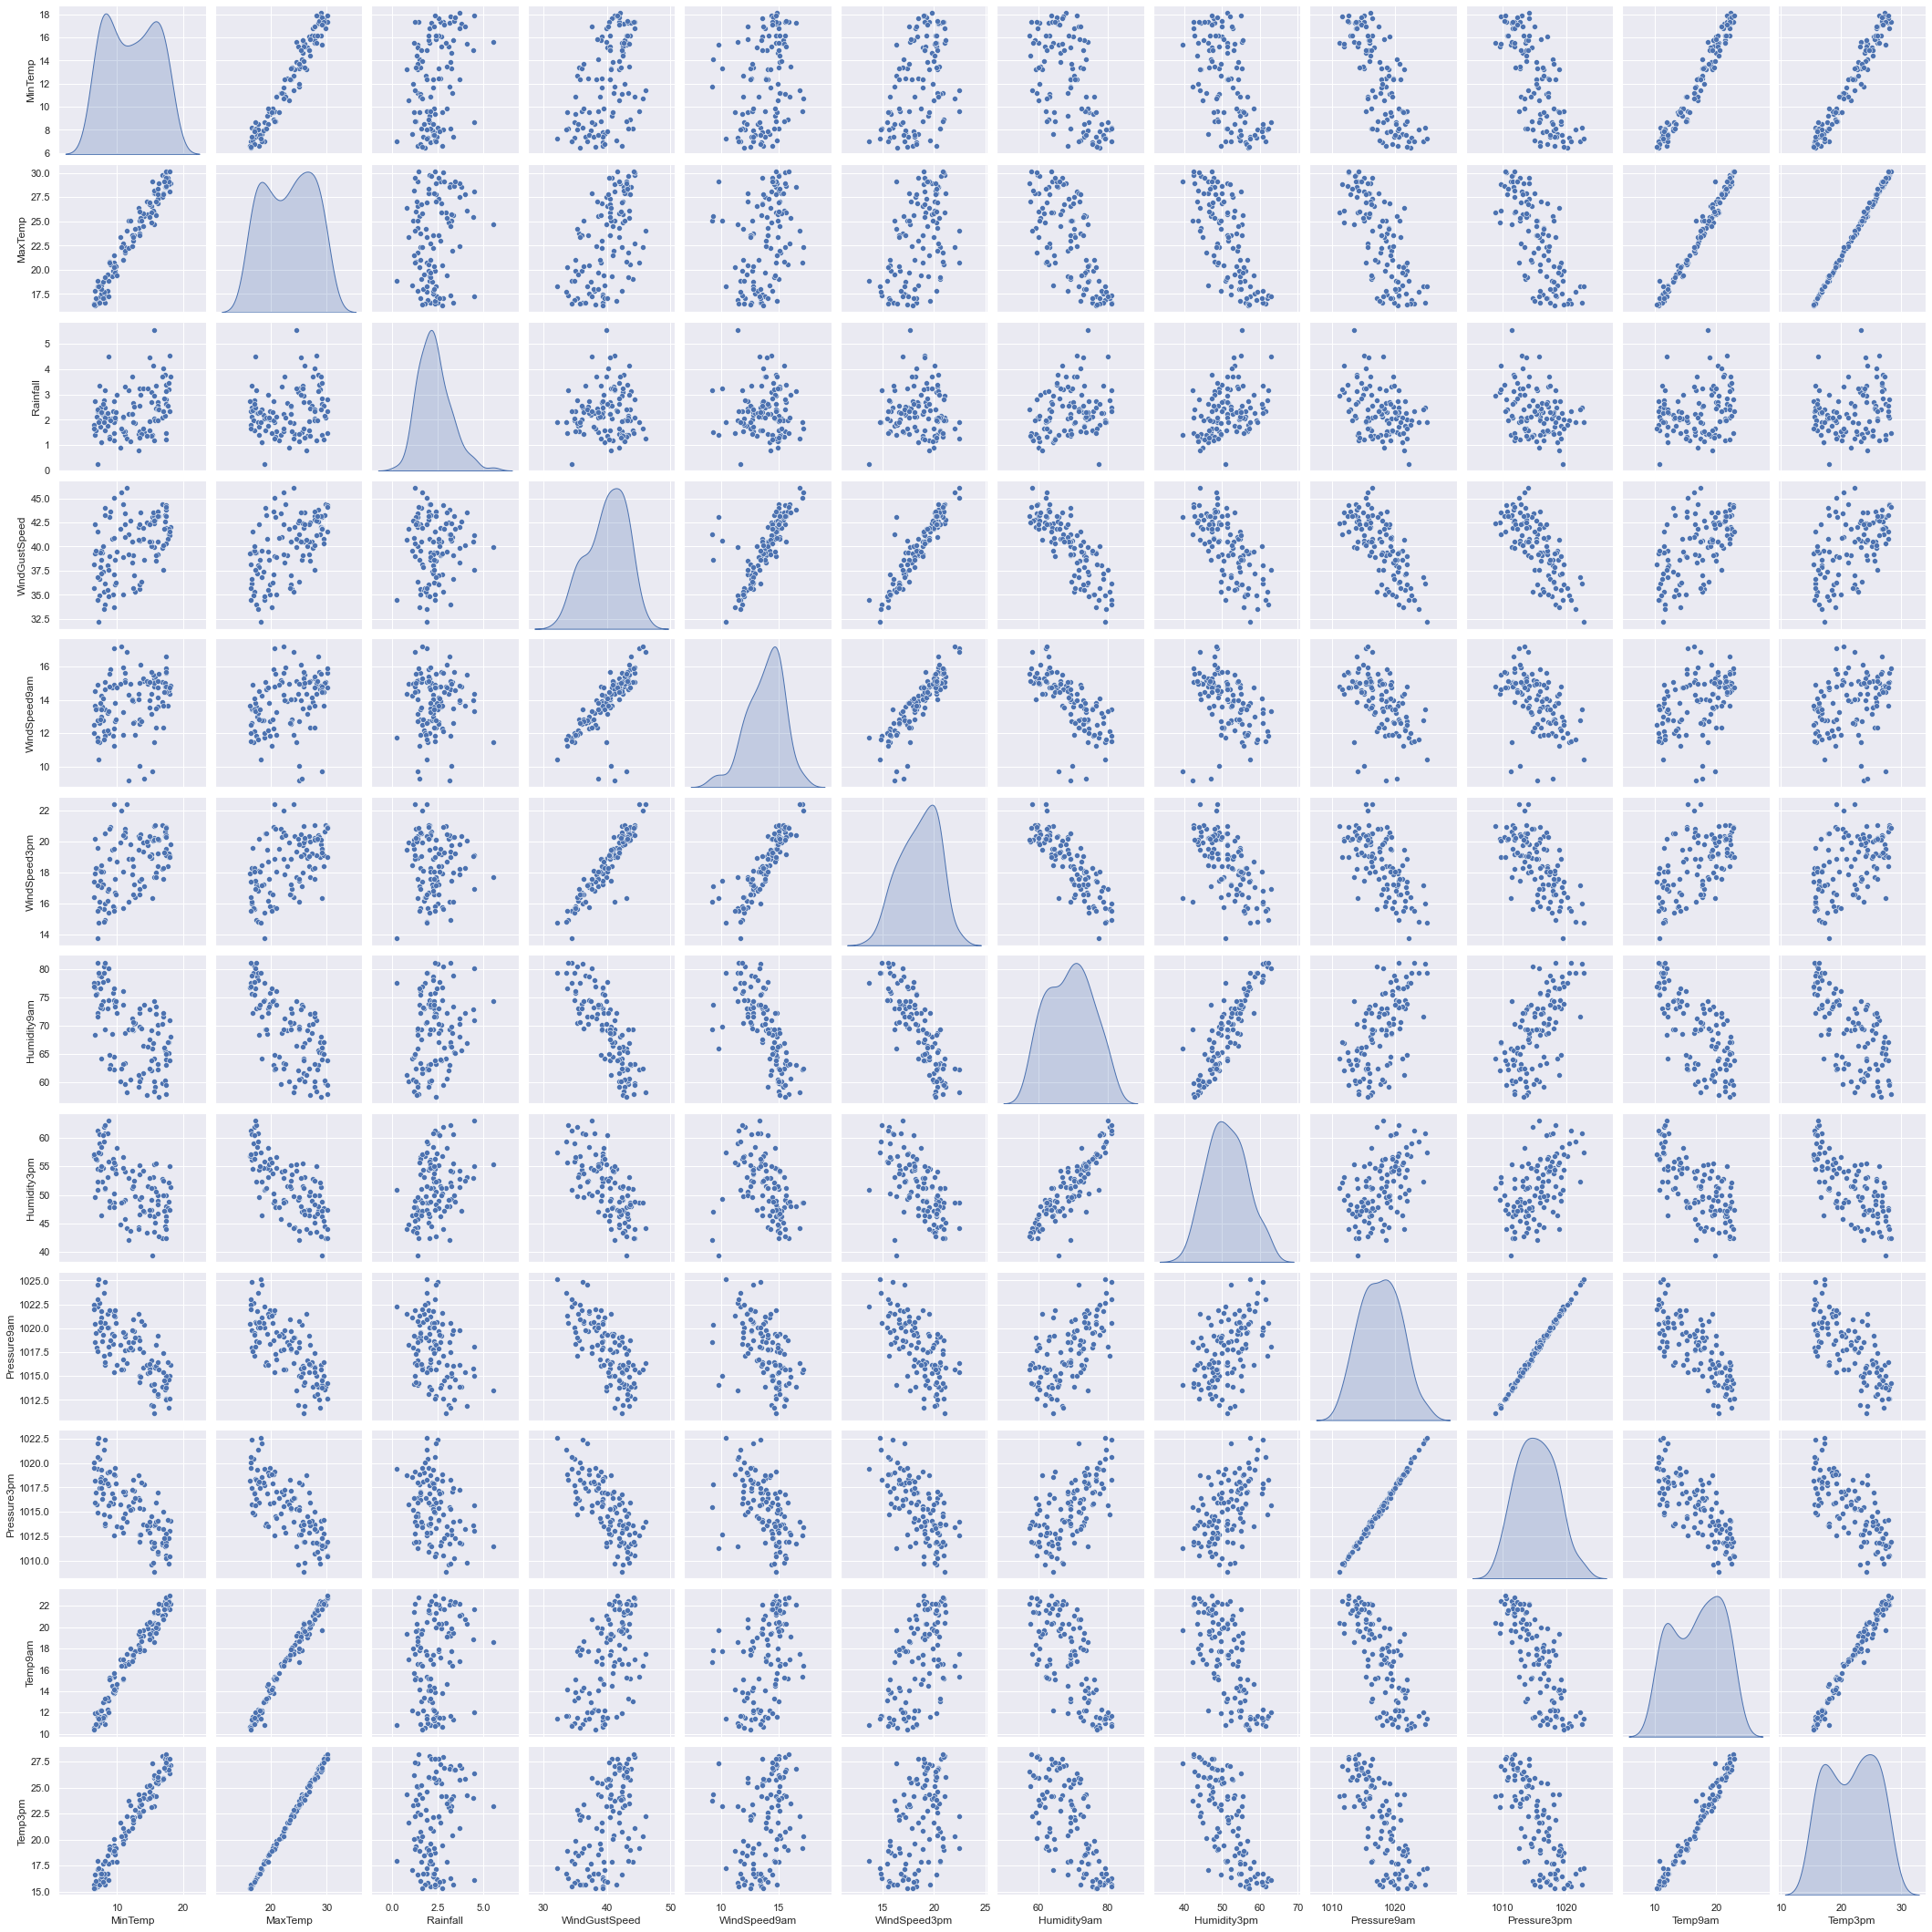

In [209]:
sns.pairplot(data=df_num,diag_kind='kde')

In [210]:
# Creating a time series data for rainfall

r_df=df_num.Rainfall

In [211]:
r_df.head()

Date
2007-11-30    3.180000
2007-12-31    3.258065
2008-01-31    1.412903
2008-02-29    5.568966
2008-03-31    1.506452
Freq: M, Name: Rainfall, dtype: float64

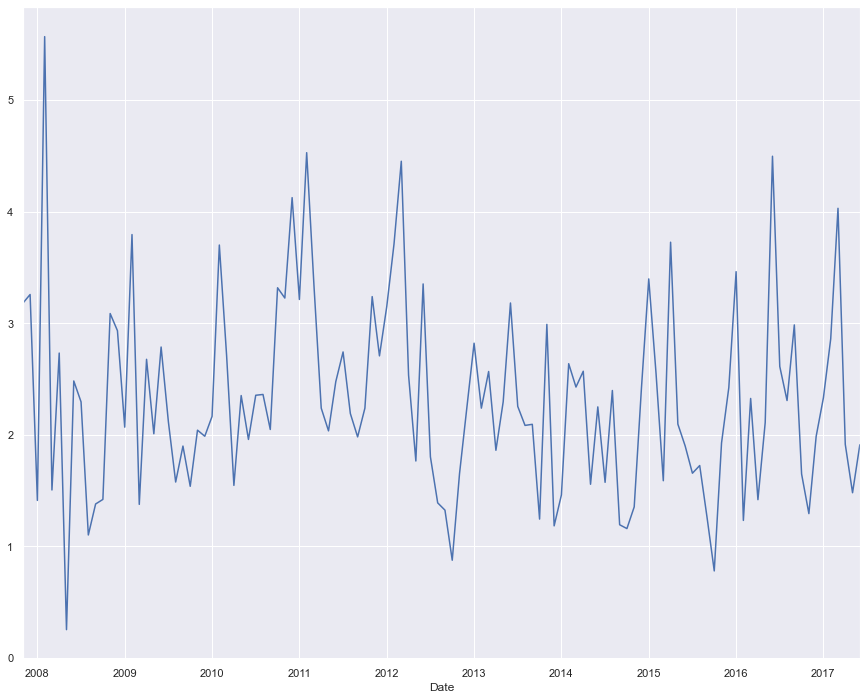

In [212]:
# Plotting the time series

r_df.plot()
plt.show()

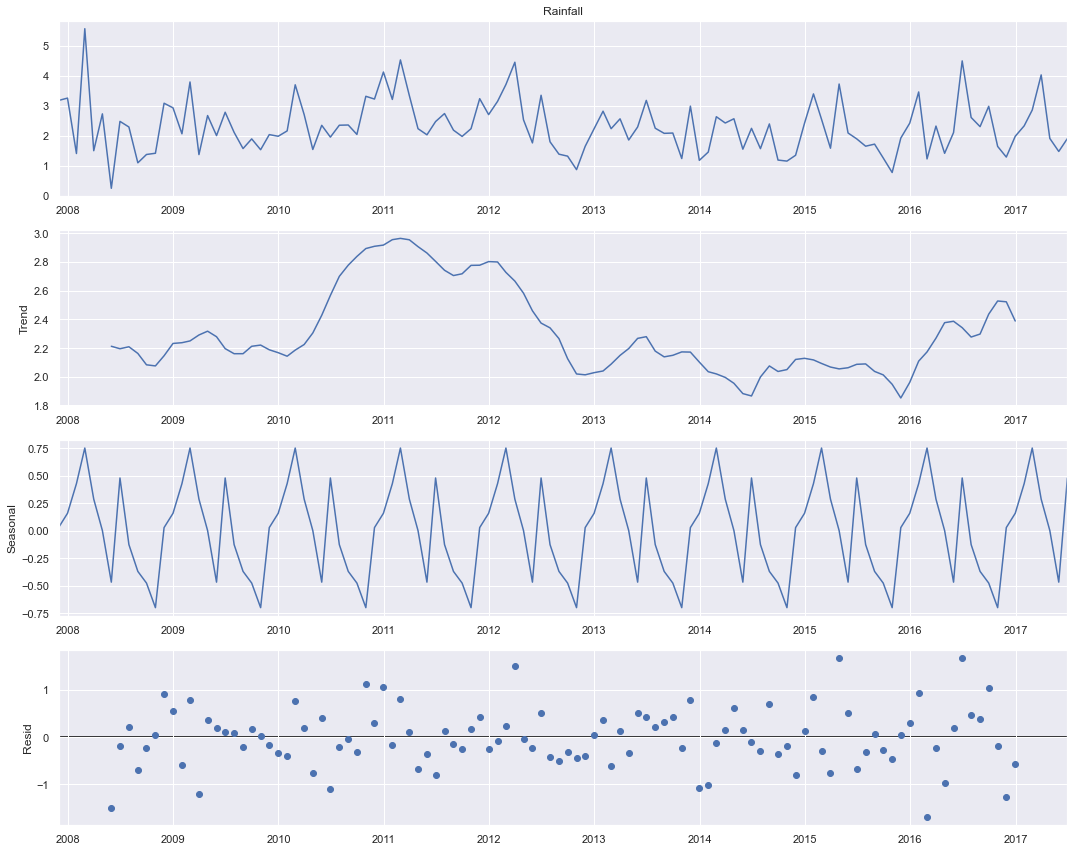

In [213]:
# Decomposing the data

sns.set(rc={'figure.figsize':(15,12)})
decomp=seasonal_decompose(r_df,model='additive')
decomp.plot();

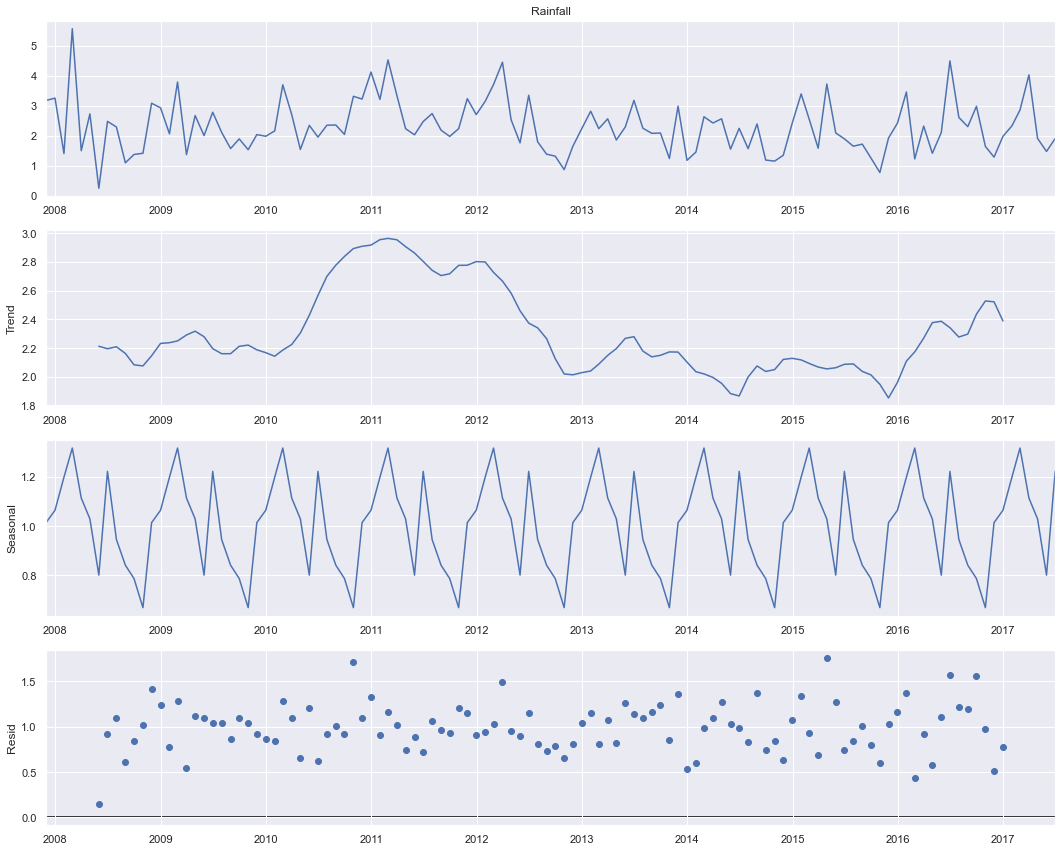

In [214]:
decomp=seasonal_decompose(r_df,model='multiplicative')
decomp.plot();

Inferences:

    * There is no trend in the data.
    * We can observe a seasonal effect on the rainfall.

In [273]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

<Figure size 936x720 with 0 Axes>

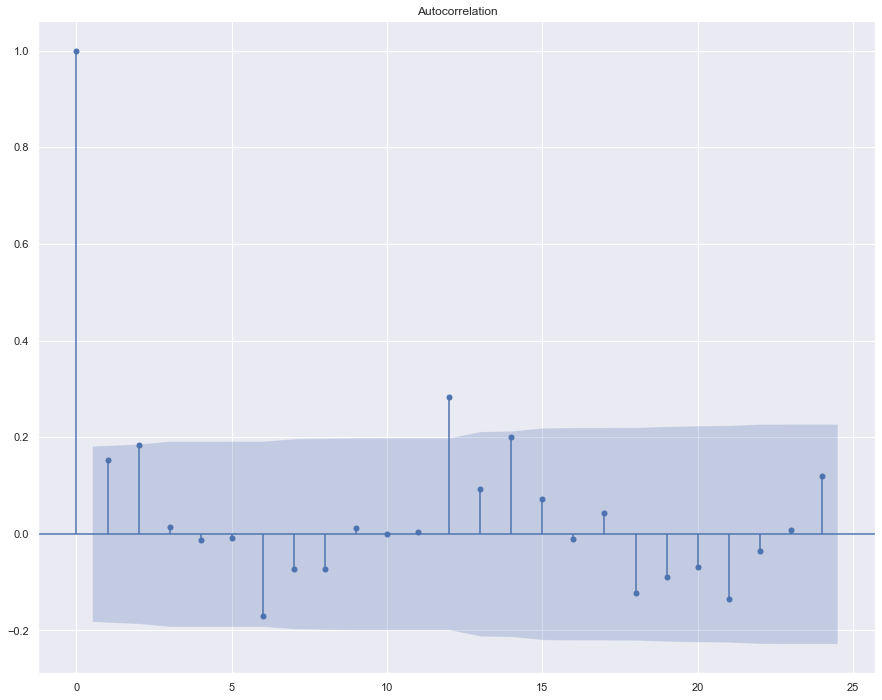

In [284]:
# Autocorrelation


plt.figure(figsize=(13,10))
plot_acf(r_df,lags=24);

<Figure size 936x720 with 0 Axes>

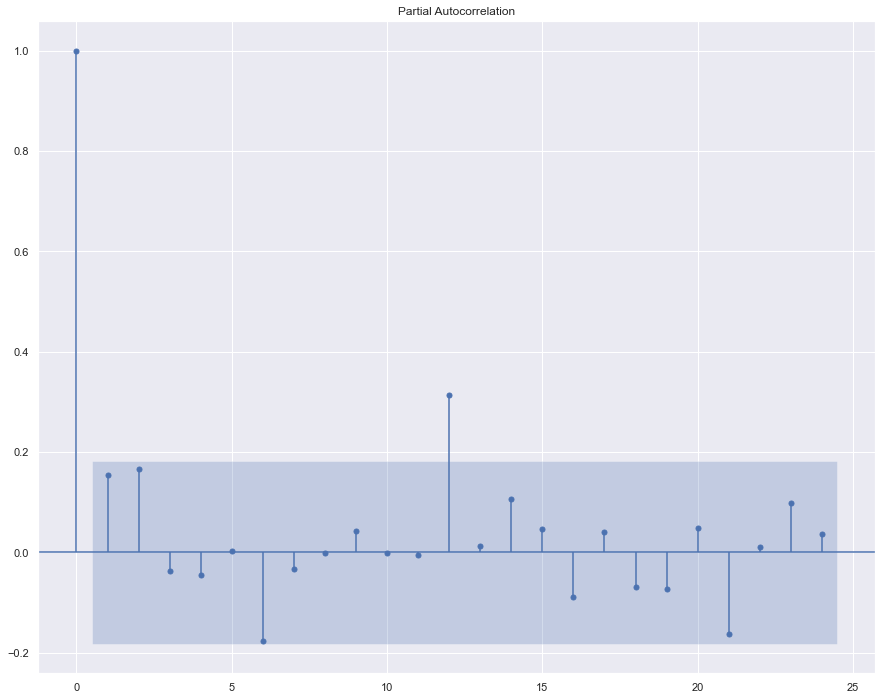

In [283]:
# Partial-AutoCorrelation

plt.figure(figsize=(13,10))
plot_pacf(r_df,lags=24);

In [215]:
# Train test split

train=r_df[pd.to_datetime(r_df.index) < pd.to_datetime('2015-01-31')]
train.shape

(86,)

In [216]:
test=r_df[pd.to_datetime(r_df.index) >= pd.to_datetime('2015-01-31')]
test.shape

(30,)

In [217]:
# Check for stationarity of the series at  𝛼  = 0.05 using appropriate statistical tests.

from statsmodels.tsa.stattools import adfuller

dtest=adfuller(train,autolag='AIC')

print('The dickey fuller test statistics: ',dtest[0],'\n')
print('The dickey fuller test pvalue: ',dtest[1])

The dickey fuller test statistics:  -4.4781766594010755 

The dickey fuller test pvalue:  0.00021528649787740388


In [ ]:
# Since the pvalue is less than 0.05 we can reject the null and can conclude that the series is stationary.

In [285]:
import itertools
p = q = range(0, 3)
d= range(0,1)
pdq = list(itertools.product(p, d, q))

model_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Model...')
print('Model: {}{}'.format(pdq[1], model_pdq[1]))
print('Model: {}{}'.format(pdq[1], model_pdq[2]))
print('Model: {}{}'.format(pdq[2], model_pdq[3]))

Examples of parameter combinations for Model...
Model: (0, 0, 1)(0, 0, 1, 6)
Model: (0, 0, 1)(0, 0, 2, 6)
Model: (0, 0, 2)(1, 0, 0, 6)


### Building a ARIMA model

In [286]:
df_param=pd.DataFrame(columns=['param','ACI'])

In [287]:
from statsmodels.tsa.arima_model import ARIMA
from warnings import filterwarnings
filterwarnings('ignore')

for i in pdq:
        try: 
            mod=ARIMA(train,order=i)
            res=mod.fit()
            df_param=df_param.append({'param':i,'ACI':res.aic},ignore_index=True)
        
        except:
            continue            

In [288]:
df_param.sort_values('ACI',ascending=True)

,param,ACI
4,"(2, 0, 0)",220.935178
2,"(0, 0, 2)",222.076123
3,"(1, 0, 0)",225.925423
0,"(0, 0, 0)",226.062031
1,"(0, 0, 1)",226.701699
6,"(2, 0, 2)",228.848424
5,"(2, 0, 1)",229.935499


In [289]:
# Base model with param (2,0,0)

ar_model=ARIMA(train,order=(2,0,0))
res=ar_model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:               Rainfall   No. Observations:                   86
Model:                     ARMA(2, 0)   Log Likelihood                -106.468
Method:                       css-mle   S.D. of innovations              0.834
Date:                Sat, 26 Feb 2022   AIC                            220.935
Time:                        17:44:24   BIC                            230.753
Sample:                    11-30-2007   HQIC                           224.886
                         - 12-31-2014                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              2.3485      0.147     15.994      0.000       2.061       2.636
ar.L1.Rainfall     0.1145      0.103      1.113      0.266      -0.087       0.316
ar.L2.Rainfall     0.2810      0.104      2.705      0.007       0.077       0.485
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.6937           +0.0000j            1.6937            0.0000
AR.2           -2.1010           +0.0000j            2.1010            0.5000
-----------------------------------------------------------------------------
"""

In [290]:
pred_ARIMA = res.forecast(steps=len(test))
pred_ARIMA[0]

array([2.07777902, 2.33859443, 2.27127435, 2.33686338, 2.32545262,
       2.34257843, 2.34133206, 2.34600213, 2.34618643, 2.34751991,
       2.34772434, 2.34812248, 2.34822551, 2.34834918, 2.34839229,
       2.34843198, 2.34844864, 2.3484617 , 2.34846788, 2.34847225,
       2.34847449, 2.34847598, 2.34847678, 2.34847728, 2.34847757,
       2.34847774, 2.34847784, 2.3484779 , 2.34847794, 2.34847796])

In [291]:
rmse_arima=np.sqrt(mean_squared_error(test,pred_ARIMA[0]))
rmse_arima

0.8858263484298767

In [292]:
resultsDf = pd.DataFrame({'Model': 'ARIMA(1,0,0)','Test RMSE': rmse_arima},index=[0])

resultsDf

,Model,Test RMSE
0,"ARIMA(1,0,0)",0.885826


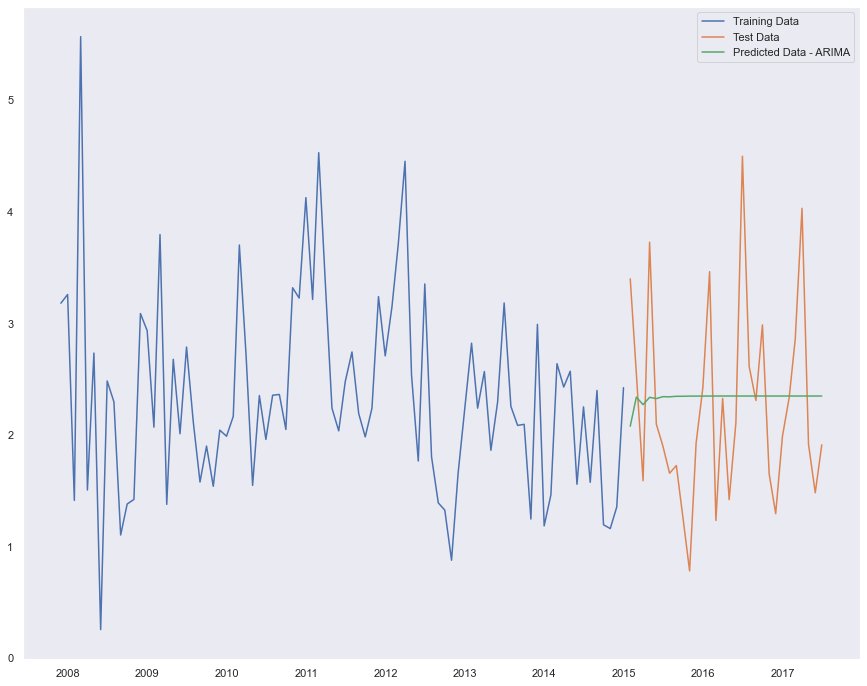

In [293]:
plt.plot(train,label='Training Data')
plt.plot(test,label='Test Data')
plt.plot(test.index,pred_ARIMA[0],label='Predicted Data - ARIMA')
plt.legend(loc='best')
plt.grid();

### Building a sarima model

In [294]:
### As the dataset has seasonality.. Let's build the model with SARIMA
df_sparam = pd.DataFrame(columns=['param','seasonal', 'AIC'])
df_sparam

,param,seasonal,AIC


In [295]:
import statsmodels.api as sm
from warnings import filterwarnings
filterwarnings('ignore')

for param in pdq:
    for param_seasonal in model_pdq:
        mod = sm.tsa.statespace.SARIMAX(train,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,
                                            enforce_invertibility=False)
        results_SARIMA = mod.fit()
        df_sparam = df_sparam.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

In [296]:
df_sparam.sort_values('AIC',ascending=True)

,param,seasonal,AIC
44,"(1, 0, 1)","(2, 0, 2, 6)",154.013921
53,"(1, 0, 2)","(2, 0, 2, 6)",154.726730
70,"(2, 0, 1)","(2, 0, 1, 6)",155.161996
43,"(1, 0, 1)","(2, 0, 1, 6)",155.168623
71,"(2, 0, 1)","(2, 0, 2, 6)",155.839653
...,...,...,...
10,"(0, 0, 1)","(0, 0, 1, 6)",284.766901
18,"(0, 0, 2)","(0, 0, 0, 6)",297.417842
1,"(0, 0, 0)","(0, 0, 1, 6)",329.362697
9,"(0, 0, 1)","(0, 0, 0, 6)",339.499376


In [297]:
sarima_best=sm.tsa.statespace.SARIMAX(train,order=(1,0,1),seasonal_order=(2,0,2,6),enforce_invertibility=False
                                     ,enforce_stationarity=False)
res=sarima_best.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                               Rainfall   No. Observations:                   86
Model:             SARIMAX(1, 0, 1)x(2, 0, [1, 2], 6)   Log Likelihood                 -70.007
Date:                                Sat, 26 Feb 2022   AIC                            154.014
Time:                                        17:45:25   BIC                            169.951
Sample:                                    11-30-2007   HQIC                           160.358
                                         - 12-31-2014                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9867      0.013     73.694      0.000       0.960       1.013
ma.L1         -0.6966      0.086     -8.078      0.000      -0.866      -0.528
ar.S.L6        0.1510      0.164      0.918      0.359      -0.171       0.473
ar.S.L12       0.5126      0.106      4.818      0.000       0.304       0.721
ma.S.L6       -0.4495      0.237     -1.898      0.058      -0.914       0.015
ma.S.L12      -0.2007      0.189     -1.061      0.289      -0.571       0.170
sigma2         0.3896      0.086      4.542      0.000       0.222       0.558
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                 2.22
Prob(Q):                              0.83   Prob(JB):                         0.33
Heteroskedasticity (H):               1.20   Skew:                             0.14
Prob(H) (two-sided):                  0.66   Kurtosis:                         2.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

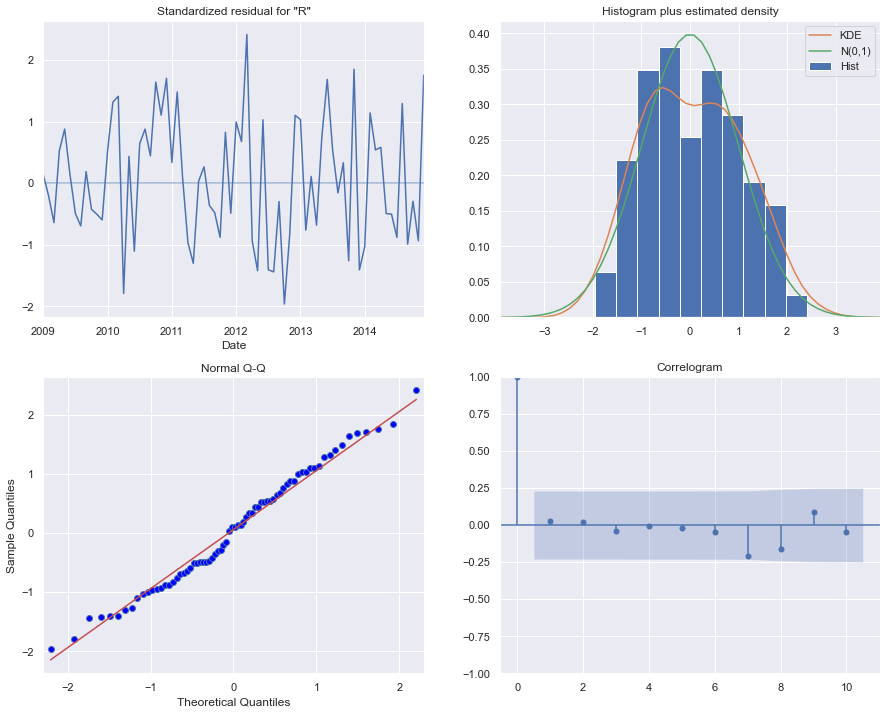

In [298]:
res.plot_diagnostics()
plt.show()

In [299]:
pred_SARIMA = res.get_forecast(steps=len(test))
pred_SARIMA.predicted_mean

2015-01-31    1.835930
2015-02-28    1.784083
2015-03-31    2.056735
2015-04-30    1.978482
2015-05-31    1.799671
2015-06-30    1.650984
2015-07-31    1.623310
2015-08-31    1.791356
2015-09-30    1.448761
2015-10-31    1.362677
2015-11-30    1.520473
2015-12-31    1.737303
2016-01-31    1.581717
2016-02-29    1.575259
2016-03-31    1.658125
2016-04-30    1.599903
2016-05-31    1.527019
2016-06-30    1.478557
2016-07-31    1.435971
2016-08-31    1.516295
2016-09-30    1.348401
2016-10-31    1.290765
2016-11-30    1.355997
2016-12-31    1.455240
2017-01-31    1.364521
2017-02-28    1.368865
2017-03-31    1.381584
2017-04-30    1.338682
2017-05-31    1.306872
2017-06-30    1.292773
Freq: M, Name: predicted_mean, dtype: float64

In [300]:
rmse_sarima=np.sqrt(mean_squared_error(test,pred_SARIMA.predicted_mean))
rmse_sarima

1.1119483976961413

In [301]:
resultsDf=resultsDf.append({'Model':'SARIMA(1,0,1),(2,0,2,6)','Test RMSE': rmse_sarima},ignore_index=True)
resultsDf

,Model,Test RMSE
0,"ARIMA(1,0,0)",0.885826
1,"SARIMA(1,0,1),(2,0,2,6)",1.111948


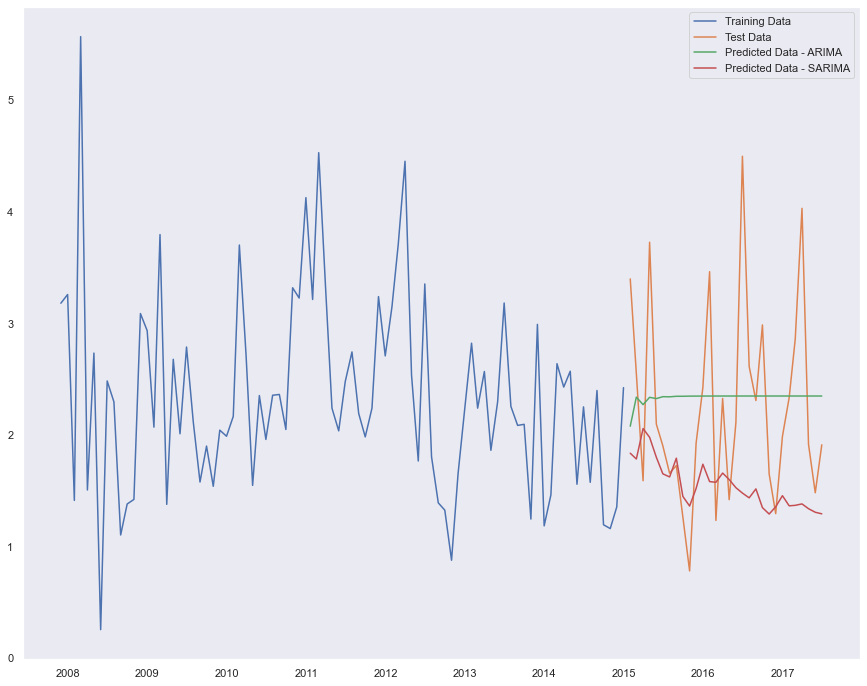

In [302]:
plt.plot(train,label='Training Data')
plt.plot(test,label='Test Data')
plt.plot(test.index,pred_ARIMA[0],label='Predicted Data - ARIMA')
plt.plot(test.index,pred_SARIMA.predicted_mean,label='Predicted Data - SARIMA')
plt.legend(loc='best')
plt.grid();

### Building SARIMAX model

In [303]:
exog=df_num.drop('Rainfall',axis=1)
exog.head()

,MinTemp,MaxTemp,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
Date,,,,,,,,,,,
2007-11-30,11.753333,25.053333,41.266667,9.166667,16.133333,69.333333,42.166667,1018.550000,1015.450000,16.750000,23.720000
2007-12-31,13.312903,25.119355,40.580645,10.032258,17.451613,69.774194,49.290323,1015.051613,1012.696774,17.767742,23.200000
2008-01-31,15.348387,29.125806,43.064516,9.709677,16.322581,65.870968,39.451613,1014.096774,1011.290323,19.716129,27.348387
2008-02-29,15.601724,24.662069,39.948276,11.465517,17.706897,74.258621,55.327586,1013.496552,1011.412069,18.584483,23.206897
2008-03-31,14.116129,25.527419,38.661290,9.274194,17.096774,73.629032,46.983871,1020.327419,1017.867742,17.791935,24.320968


In [304]:
ex_train=exog[pd.to_datetime(exog.index) < pd.to_datetime('2015-01-31')]
ex_test=exog[pd.to_datetime(exog.index) >= pd.to_datetime('2015-01-31')]

In [305]:
df_sxparam = pd.DataFrame(columns=['param','seasonal', 'AIC'])
df_sxparam

,param,seasonal,AIC


In [306]:
for param in pdq:
    for param_seasonal in model_pdq:
        mod = sm.tsa.statespace.SARIMAX(train,order=param,seasonal_order=param_seasonal,exog=ex_train,
                                        enforce_stationarity=False,
                                        enforce_invertibility=False)
        results_SARIMA = mod.fit()
        df_sxparam = df_sxparam.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

In [307]:
df_sxparam.sort_values('AIC',ascending=True)

,param,seasonal,AIC
6,"(0, 0, 0)","(2, 0, 0, 6)",117.082417
1,"(0, 0, 0)","(0, 0, 1, 6)",120.013398
33,"(1, 0, 0)","(2, 0, 0, 6)",120.525029
2,"(0, 0, 0)","(0, 0, 2, 6)",120.623647
3,"(0, 0, 0)","(1, 0, 0, 6)",120.681820
...,...,...,...
71,"(2, 0, 1)","(2, 0, 2, 6)",361.274311
64,"(2, 0, 1)","(0, 0, 1, 6)",367.779428
66,"(2, 0, 1)","(1, 0, 0, 6)",368.523291
67,"(2, 0, 1)","(1, 0, 1, 6)",370.456910


In [308]:
sarimax_best=sm.tsa.statespace.SARIMAX(train,order=(0,0,0),seasonal_order=(2,0,0,6),exog=ex_train,enforce_invertibility=False
                                     ,enforce_stationarity=False)
res=sarimax_best.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                
===============================================================================
Dep. Variable:                Rainfall   No. Observations:                   86
Model:             SARIMAX(2, 0, 0, 6)   Log Likelihood                 -44.541
Date:                 Sat, 26 Feb 2022   AIC                            117.082
Time:                         17:47:38   BIC                            149.339
Sample:                     11-30-2007   HQIC                           129.950
                          - 12-31-2014                                         
Covariance Type:                   opg                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
MinTemp           0.2135      0.437      0.489      0.625      -0.643       1.070
MaxTemp           0.1515      1.034      0.147      0.884      -1.876       2.179
WindGustSpeed     0.2696      0.107      2.521      0.012       0.060       0.479
WindSpeed9am     -0.0672      0.325     -0.207      0.836      -0.704       0.570
WindSpeed3pm     -0.2034      0.215     -0.945      0.345      -0.625       0.219
Humidity9am       0.1452      0.116      1.255      0.209      -0.081       0.372
Humidity3pm      -0.0045      0.133     -0.034      0.973      -0.266       0.257
Pressure9am      -0.3901      0.785     -0.497      0.619      -1.929       1.149
Pressure3pm       0.3787      0.786      0.482      0.630      -1.162       1.919
Temp9am           0.5718      0.410      1.396      0.163      -0.231       1.375
Temp3pm          -0.7700      1.158     -0.665      0.506      -3.040       1.500
ar.S.L6          -0.0070      0.139     -0.050      0.960      -0.280       0.266
ar.S.L12          0.0458      0.147      0.312      0.755      -0.242       0.333
sigma2            0.1954      0.037      5.277      0.000       0.123       0.268
===================================================================================
Ljung-Box (L1) (Q):                   0.16   Jarque-Bera (JB):                 9.02
Prob(Q):                              0.69   Prob(JB):                         0.01
Heteroskedasticity (H):               1.37   Skew:                             0.56
Prob(H) (two-sided):                  0.44   Kurtosis:                         4.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

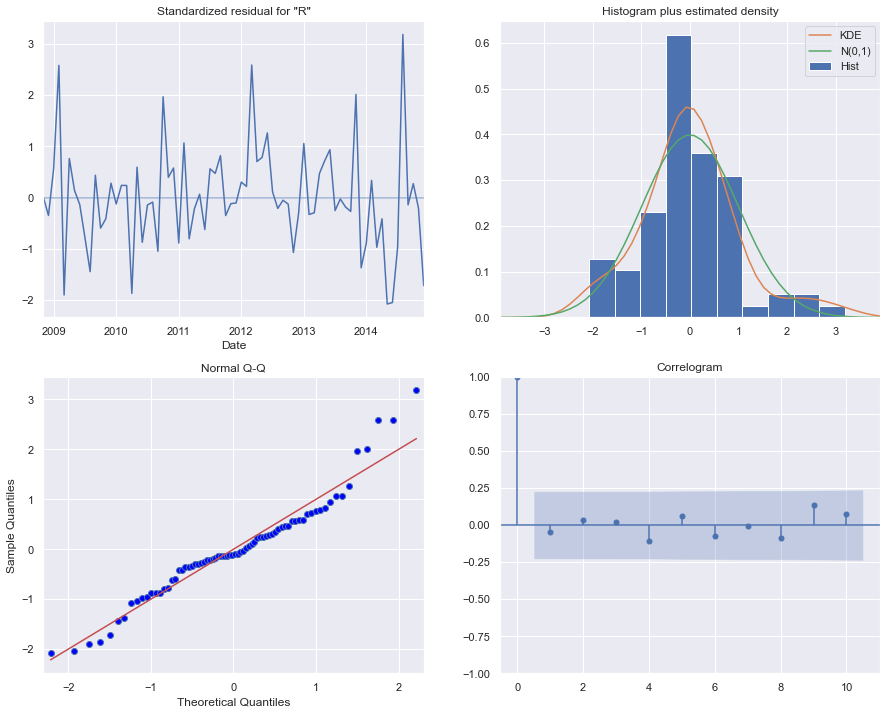

In [309]:
res.plot_diagnostics()
plt.show()

In [310]:
pred_SARIMAX = res.get_forecast(steps=len(test),exog=ex_test)
pred_SARIMAX.predicted_mean

2015-01-31    3.346697
2015-02-28    2.853426
2015-03-31    2.120072
2015-04-30    2.594419
2015-05-31    2.392692
2015-06-30    2.052210
2015-07-31    2.144256
2015-08-31    1.859062
2015-09-30    1.011216
2015-10-31    1.093404
2015-11-30    2.493190
2015-12-31    2.123408
2016-01-31    3.533755
2016-02-29    2.442035
2016-03-31    3.003490
2016-04-30    1.891786
2016-05-31    2.882256
2016-06-30    3.494092
2016-07-31    3.175021
2016-08-31    2.037215
2016-09-30    3.070820
2016-10-31    2.313670
2016-11-30    1.972917
2016-12-31    2.927197
2017-01-31    3.091427
2017-02-28    2.982244
2017-03-31    3.732733
2017-04-30    1.961782
2017-05-31    1.978001
2017-06-30    1.080215
Freq: M, Name: predicted_mean, dtype: float64

In [311]:
rmse_sarimax=np.sqrt(mean_squared_error(test,pred_SARIMAX.predicted_mean))
rmse_sarimax

0.5813996148652036

In [312]:
resultsDf=resultsDf.append({'Model':'SARIMAX(0,0,0),(2,0,0,6)','Test RMSE': rmse_sarimax},ignore_index=True)
resultsDf

,Model,Test RMSE
0,"ARIMA(1,0,0)",0.885826
1,"SARIMA(1,0,1),(2,0,2,6)",1.111948
2,"SARIMAX(0,0,0),(2,0,0,6)",0.581400


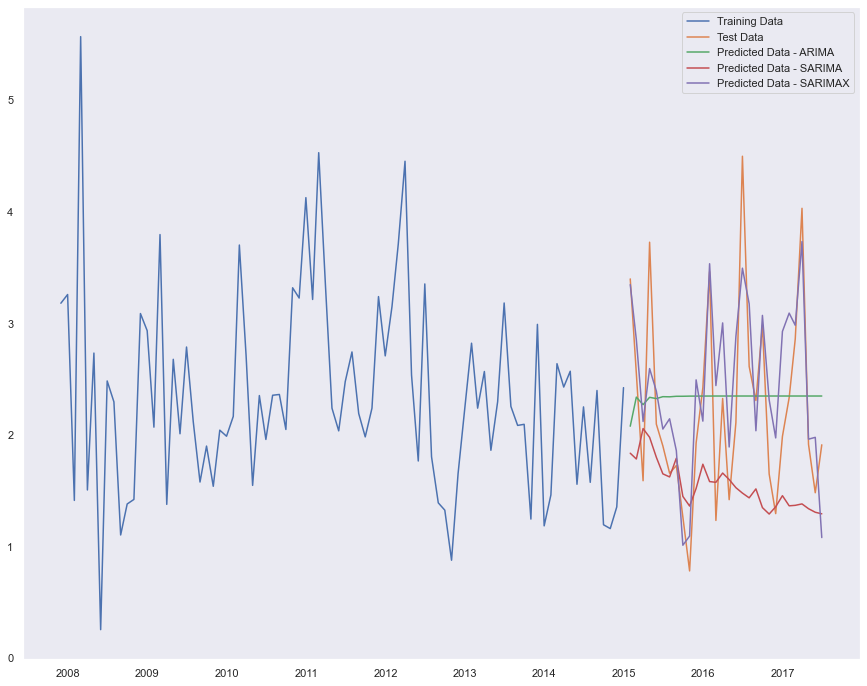

In [313]:
plt.plot(train,label='Training Data')
plt.plot(test,label='Test Data')
plt.plot(test.index,pred_ARIMA[0],label='Predicted Data - ARIMA')
plt.plot(test.index,pred_SARIMA.predicted_mean,label='Predicted Data - SARIMA')
plt.plot(test.index,pred_SARIMAX.predicted_mean,label='Predicted Data - SARIMAX')
plt.legend(loc='best')
plt.grid();

### Conclusion:

The best model is the SARIMAX model with param=(0,0,0) and seasonal params=(0,0,1,12)